In [1]:
import CellScopes as cs

WebIO._IJuliaInit()

Welcome to use CellScopes.jl!


### Step 1. Load the cs object generated in Figure 1

In [2]:
@time dkd1 = cs.load(filename = "../../processed_data/version_1/dkd1_by_CS.jld2") 

 13.771896 seconds (10.09 M allocations: 1.636 GiB, 4.16% gc time, 60.81% compilation time: 13% of which was recompilation)


VisiumObject in CellScopes.jl


Genes x Cells = 18063 x 2802
Available data:
- rawCount
- normCount
- metaData
- spmetaData
- imageData
All fields:
- rawCount
- normCount
- scaleCount
- metaData
- spmetaData
- varGene
- dimReduction
- clustData
- imageData


### Step 2. Generate spatial dim plot for glomeruli subclusters

In [3]:
using CairoMakie

In [4]:
empty_theme = Theme(
    Axis = (
        backgroundcolor = :transparent,
        leftspinevisible = false,
        rightspinevisible = false,
        bottomspinevisible = false,
        topspinevisible = false,
        xticklabelsvisible = false, 
        yticklabelsvisible = false,
        xgridcolor = :transparent,
        ygridcolor = :transparent,
        xminorticksvisible = false,
        yminorticksvisible = false,
        xticksvisible = false,
        yticksvisible = false,
        xautolimitmargin = (0.0,0.0),
        yautolimitmargin = (0.0,0.0),
    )
);

update_theme!(empty_theme)

#### 2.1. Add meta data

In [5]:
using CSV
using DataFrames

In [34]:
anno_df = CSV.read("../../meta/subclusters_glomeruli.csv", DataFrame);
dkd1.metaData.cluster = String.(anno_df[!,"glom_class"]);
dkd1.spmetaData.cluster = String.(anno_df[!,"glom_class"]);

In [35]:
alpha = 0.01
cell_anno = ["DKDG",
             "SGS",
             "GGS",
             "none"
]
c_map = ["#fff088", 
         "#c3ab00",
         "#615500",
        ("#000000",alpha)
]
anno_color=Dict{String, Any}(cell_anno .=> c_map);

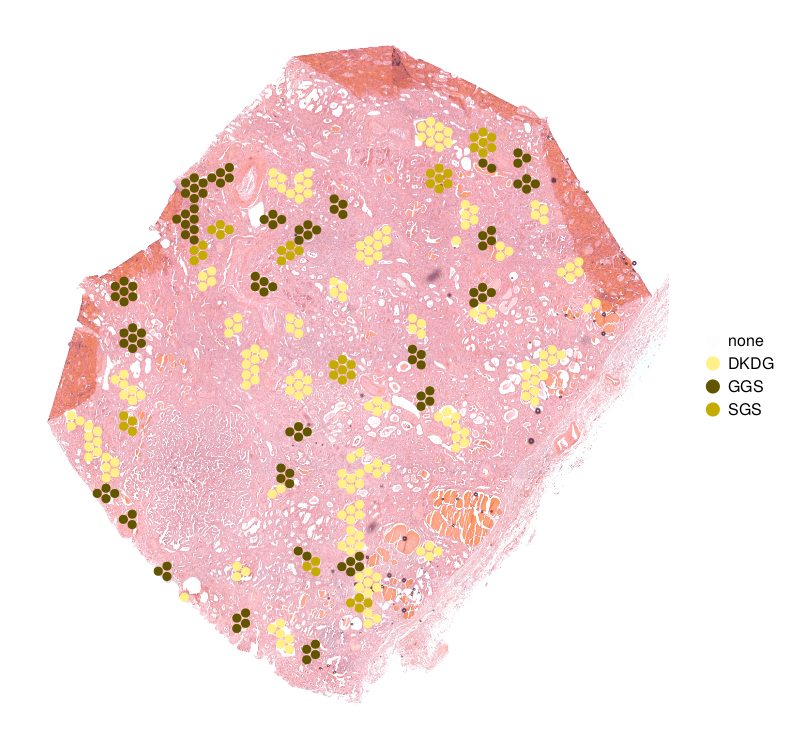

In [36]:
p = cs.sp_dim_plot(dkd1, "cluster"; 
    marker_size = 13, canvas_size = (800,750), adjust_contrast=1.5, adjust_brightness = 0.1,
    do_label=false, alpha=1, img_res="high", anno_color=anno_color);
    

# save("../../plots/version_1/main_figures_cs/spDimPlot_cs_glom_subcluster.png", p);
# save("../../plots/version_1/main_figures_cs/spDimPlot_cs_glom_subcluster.pdf", p);
# save("../../plots/version_1/main_figures_cs/spDimPlot_cs_glom_subcluster.svg", p);
    
p

### Step 3. Generate zoomed DimPlot for G37

In [54]:
anno_df = CSV.read("../../meta/subclusters_glomeruli.csv", DataFrame);
anno_df_G37 = CSV.read("../../meta/subclusters_glomeruli_G37.csv", DataFrame);
rename!(anno_df_G37, :Barcode => :barcode);
anno_df.Index = 1:nrow(anno_df);

In [58]:
merged_anno = leftjoin(anno_df, anno_df_G37, on = (:barcode))
merged_anno[ismissing.(merged_anno.glom_id2), :glom_id2] .= "other";
sort!(merged_anno, :Index);

In [59]:
dkd1.metaData.cluster = String.(merged_anno[!,"glom_id2"]);
dkd1.spmetaData.cluster = String.(merged_anno[!,"glom_id2"]);

In [60]:
alpha = 0.01
cell_anno = [
             "G37",
             
             "other"
]
c_map = [
         "#c3ab00",
         
        ("#000000",alpha)
]
anno_color=Dict{String, Any}(cell_anno .=> c_map);

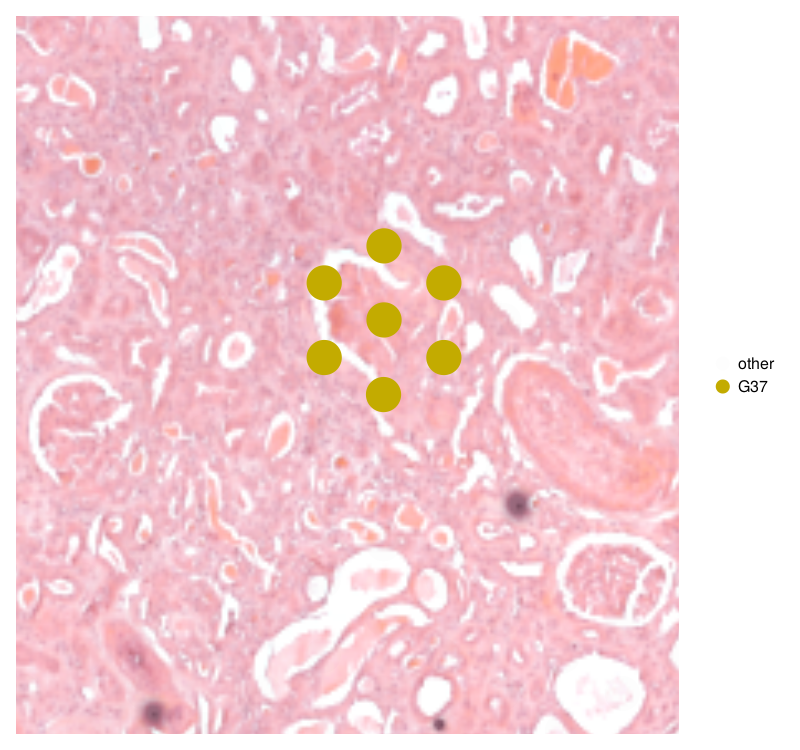

In [78]:
p = cs.sp_dim_plot(dkd1, "cluster"; 
    marker_size = 50, canvas_size = (800,750), adjust_contrast=1.5, adjust_brightness = 0.1,
    do_label=false, alpha=1, img_res="high", anno_color=anno_color,
    x_lims = (850, 1050),
    y_lims = (770, 970));
    

save("../../plots/version_1/supp_figures_cs/spDimPlot_cs_glom_G37.png", p);
save("../../plots/version_1/supp_figures_cs/spDimPlot_cs_glom_G37.pdf", p);
save("../../plots/version_1/supp_figures_cs/spDimPlot_cs_glom_G37.svg", p);
    
p

In [15]:
using Pkg
pkgs = Pkg.installed();
pkgs

┌ Warning: Pkg.installed() is deprecated
└ @ Pkg ~/julia-1.9.4/share/julia/stdlib/v1.9/Pkg/src/Pkg.jl:745


Dict{String, VersionNumber} with 6 entries:
  "CSV"        => v"0.10.11"
  "CairoMakie" => v"0.10.12"
  "IJulia"     => v"1.24.2"
  "DataFrames" => v"1.6.1"
  "Leiden"     => v"0.1.0"
  "CellScopes" => v"0.1.0"